<a href="https://colab.research.google.com/github/nandaaa20/ananda_muhammad_farid-227006516051/blob/main/UAS_ML_Ananda_Muhammad_Farid_227006516051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# GANTI sesuai keinginanmu (folder di Google Drive)
PROJECT_DIR = "/content/drive/MyDrive/UAS-ML-Ananda-Muhammad-Farid-227006516051"

subdirs = [
    "data/data_raw", "data/data_processed",
    "models", "reports/figures", "src", "scripts", "notebooks"
]
for sd in subdirs:
    os.makedirs(os.path.join(PROJECT_DIR, sd), exist_ok=True)

print("Project dir:", PROJECT_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project dir: /content/drive/MyDrive/UAS-ML-Ananda-Muhammad-Farid-227006516051


In [ ]:
!pip -q install pandas numpy scikit-learn matplotlib seaborn joblib


In [ ]:
import os, random
import numpy as np
import matplotlib
matplotlib.use("Agg")  # hindari render ke layar
import matplotlib.pyplot as plt

def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)

def ensure_dir(path: str):
    os.makedirs(path, exist_ok=True)

def save_fig(fig, out_path: str, dpi: int = 150, bbox_inches: str = "tight"):
    ensure_dir(os.path.dirname(out_path))
    fig.savefig(out_path, dpi=dpi, bbox_inches=bbox_inches)
    plt.close(fig)

seed_everything(42)
print("Utils ready.")


Utils ready.


In [ ]:
import urllib.request, os

raw_dir = os.path.join(PROJECT_DIR, "data/data_raw")
csv_path = os.path.join(raw_dir, "forestfires.csv")
names_path = os.path.join(raw_dir, "forestfires.names")

urls = {
    csv_path: "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv",
    names_path: "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.names",
}

for dst, url in urls.items():
    if not os.path.exists(dst):
        print("Downloading:", url)
        urllib.request.urlretrieve(url, dst)
        print("Saved ->", dst)
    else:
        print("Exists ->", dst)

print("Done.")


Downloading: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
Saved -> /content/drive/MyDrive/UAS-ML-Ananda-Muhammad-Farid-227006516051/data/data_raw/forestfires.csv
Downloading: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.names
Saved -> /content/drive/MyDrive/UAS-ML-Ananda-Muhammad-Farid-227006516051/data/data_raw/forestfires.names
Done.


In [ ]:
import pandas as pd
import numpy as np
import os

raw_csv = os.path.join(PROJECT_DIR, "data/data_raw/forestfires.csv")
raw_names = os.path.join(PROJECT_DIR, "data/data_raw/forestfires.names")
out_dir = os.path.join(PROJECT_DIR, "data/data_processed")
out_csv = os.path.join(out_dir, "forestfires_clean.csv")
os.makedirs(out_dir, exist_ok=True)

assert os.path.exists(raw_csv), f"Not found: {raw_csv}"
assert os.path.exists(raw_names), f"Not found: {raw_names}"

df = pd.read_csv(raw_csv)

# Map month/day -> angka jika masih string
month_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
             'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
day_map = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}

if df['month'].dtype == object:
    df['month'] = df['month'].str.lower().map(month_map)
if df['day'].dtype == object:
    df['day'] = df['day'].str.lower().map(day_map)

# Drop duplikat (opsional)
df = df.drop_duplicates()

# Tambahkan transformasi target (opsional)
df['area_log'] = np.log1p(df['area'])

df.to_csv(out_csv, index=False)
print("Saved cleaned ->", out_csv)


Saved cleaned -> /content/drive/MyDrive/UAS-ML-Ananda-Muhammad-Farid-227006516051/data/data_processed/forestfires_clean.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

data_path = os.path.join(PROJECT_DIR, "data/data_processed/forestfires_clean.csv")
fig_dir = os.path.join(PROJECT_DIR, "reports/figures")
os.makedirs(fig_dir, exist_ok=True)

df = pd.read_csv(data_path)

# 1) Distribusi area
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['area'], bins=50)
ax.set_title('Distribusi Area'); ax.set_xlabel('area'); ax.set_ylabel('count')
save_fig(fig, os.path.join(fig_dir, "dist_area.png"))

# 2) Distribusi area_log
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['area_log'], bins=50)
ax.set_title('Distribusi area_log'); ax.set_xlabel('area_log'); ax.set_ylabel('count')
save_fig(fig, os.path.join(fig_dir, "dist_area_log.png"))

# 3) Heatmap korelasi numerik
num_cols = df.select_dtypes(include=['int64','float64']).columns
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', ax=ax)
ax.set_title('Heatmap Korelasi (Numerik)')
save_fig(fig, os.path.join(fig_dir, "corr_heatmap.png"))

# 4) Scatter fitur vs area
for col in [c for c in ['temp','RH','wind','rain','FFMC','DMC','DC','ISI','month','day'] if c in df.columns]:
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(df[col], df['area'], s=10, alpha=0.6)
    ax.set_xlabel(col); ax.set_ylabel('area'); ax.set_title(f'{col} vs area')
    save_fig(fig, os.path.join(fig_dir, f"{col}_vs_area.png"))

print("EDA figures saved in:", fig_dir)


EDA figures saved in: /content/drive/MyDrive/UAS-ML-Ananda-Muhammad-Farid-227006516051/reports/figures


In [ ]:
import os, joblib, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

data_path = os.path.join(PROJECT_DIR, "data/data_processed/forestfires_clean.csv")
reports_dir = os.path.join(PROJECT_DIR, "reports")
models_dir = os.path.join(PROJECT_DIR, "models")
os.makedirs(reports_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

df = pd.read_csv(data_path)

# Target: "area" (atau ganti ke "area_log")
TARGET = "area"
drop_cols = ['area_log'] if TARGET == 'area' else ['area']
X = df.drop(columns=[TARGET] + drop_cols)
y = df[TARGET]

cat_features = [c for c in ['month','day'] if c in X.columns]
num_features = [c for c in X.columns if c not in cat_features]

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
], remainder='drop')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Baseline
linreg = Pipeline([('prep', preprocess), ('model', LinearRegression())])
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)
rmse_lr = float(np.sqrt(mean_squared_error(y_test, y_pred_lr)))
r2_lr = float(r2_score(y_test, y_pred_lr))

# RandomForest + GridSearch (silent)
rf = Pipeline([('prep', preprocess), ('model', RandomForestRegressor(random_state=42, n_jobs=-1))])
param_grid = {
    'model__n_estimators': [200, 400],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}
gscv = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1,
                    scoring='neg_root_mean_squared_error', verbose=0)
gscv.fit(X_train, y_train)
best = gscv.best_estimator_

y_pred_rf = best.predict(X_test)
rmse_rf = float(np.sqrt(mean_squared_error(y_test, y_pred_rf)))
r2_rf = float(r2_score(y_test, y_pred_rf))

# Save model & metrics
model_path = os.path.join(models_dir, f"regressor_{TARGET}.joblib")
joblib.dump(best, model_path)

with open(os.path.join(reports_dir, f"metrics_regression_{TARGET}.txt"), "w") as f:
    f.write("=== Baseline: LinearRegression ===\n")
    f.write(f"RMSE: {rmse_lr}\nR2: {r2_lr}\n\n")
    f.write("=== RandomForest (Best) ===\n")
    f.write(f"Best Params: {gscv.best_params_}\n")
    f.write(f"RMSE: {rmse_rf}\nR2: {r2_rf}\n")
    f.write(f"Saved model: {model_path}\n")

print("Saved model & metrics to Drive.")


Saved model & metrics to Drive.


In [ ]:
import os, joblib, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data_path = os.path.join(PROJECT_DIR, "data/data_processed/forestfires_clean.csv")
fig_dir = os.path.join(PROJECT_DIR, "reports/figures")
reports_dir = os.path.join(PROJECT_DIR, "reports")
model_path = os.path.join(PROJECT_DIR, "models", "regressor_area.joblib")  # sesuaikan jika TARGET berbeda

os.makedirs(fig_dir, exist_ok=True)
os.makedirs(reports_dir, exist_ok=True)

pipe = joblib.load(model_path)
prep = pipe.named_steps["prep"]
model = pipe.named_steps["model"]

# Fitur setelah preprocess
try:
    feature_names = prep.get_feature_names_out()
except Exception:
    # fallback
    feature_names = []
    for name, trans, cols in getattr(prep, "transformers_", []):
        if name == "num":
            feature_names += list(cols)
        elif name == "cat":
            try:
                feature_names += list(trans.get_feature_names_out(cols))
            except Exception:
                feature_names += [str(c) for c in cols]

importances = getattr(model, "feature_importances_", None)
if importances is not None:
    fi = pd.DataFrame({"feature": feature_names, "importance": importances})
    fi = fi.sort_values("importance", ascending=False)
    fi.to_csv(os.path.join(reports_dir, "feature_importances.csv"), index=False)

    # Plot top-20
    topn = fi.head(20).sort_values("importance")
    fig, ax = plt.subplots(figsize=(8,6))
    ax.barh(topn["feature"], topn["importance"])
    ax.set_title("Feature Importances (Top 20)")
    ax.set_xlabel("importance")
    save_fig(fig, os.path.join(fig_dir, "feature_importances_top20.png"))

# Plot pred vs actual + residuals
df = pd.read_csv(data_path)
TARGET = "area"
drop_cols = ["area_log"] if TARGET == "area" else ["area"]
X = df.drop(columns=[TARGET] + drop_cols); y = df[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = pipe.predict(X_test)

# Pred vs Actual
lo = float(min(np.min(y_test), np.min(y_pred)))
hi = float(max(np.max(y_test), np.max(y_pred)))
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y_test, y_pred, s=10, alpha=0.7)
ax.plot([lo, hi], [lo, hi])
ax.set_title("Predicted vs Actual (Test)")
ax.set_xlabel("Actual"); ax.set_ylabel("Predicted")
save_fig(fig, os.path.join(fig_dir, "pred_vs_actual.png"))

# Residuals
res = y_test - y_pred
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(res, bins=50)
ax.set_title("Residuals Distribution (Test)")
ax.set_xlabel("Residual"); ax.set_ylabel("Count")
save_fig(fig, os.path.join(fig_dir, "residuals_hist.png"))

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_pred, res, s=10, alpha=0.7)
ax.axhline(0)
ax.set_title("Residuals vs Predicted (Test)")
ax.set_xlabel("Predicted"); ax.set_ylabel("Residual")
save_fig(fig, os.path.join(fig_dir, "residuals_vs_pred.png"))

print("Saved FI & evaluation plots.")


Saved FI & evaluation plots.


In [ ]:
import os, joblib, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

data_path = os.path.join(PROJECT_DIR, "data/data_processed/forestfires_clean.csv")
reports_dir = os.path.join(PROJECT_DIR, "reports")
fig_dir = os.path.join(PROJECT_DIR, "reports/figures")
models_dir = os.path.join(PROJECT_DIR, "models")
os.makedirs(reports_dir, exist_ok=True)
os.makedirs(fig_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

df = pd.read_csv(data_path)

bins = [-1, 0, 5, 20, np.inf]
labels = ["NoFire", "Small", "Medium", "Large"]
df["area_cls"] = pd.cut(df["area"], bins=bins, labels=labels)
df = df.dropna(subset=["area_cls"])

TARGET = "area_cls"
X = df.drop(columns=[TARGET, "area", "area_log"]); y = df[TARGET]

cat_features = [c for c in ["month","day"] if c in X.columns]
num_features = [c for c in X.columns if c not in cat_features]

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
], remainder="drop")

try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
except ValueError:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

clf = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(random_state=42, class_weight="balanced", n_jobs=-1))
])

param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10],
}
gscv = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1,
                    scoring="f1_weighted", verbose=0)
gscv.fit(X_train, y_train)
best = gscv.best_estimator_
y_pred = best.predict(X_test)

# Save laporan
report_txt = classification_report(y_test, y_pred, digits=4, zero_division=0)
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

with open(os.path.join(reports_dir, "metrics_classification.txt"), "w") as f:
    f.write(f"Best Params: {gscv.best_params_}\n\n")
    f.write(report_txt + "\n")
    f.write("Confusion Matrix (rows=true, cols=pred):\n")
    f.write(cm_df.to_string() + "\n")

joblib.dump(best, os.path.join(models_dir, "classifier_area_cls.joblib"))

# Confusion matrix plot
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_title("Confusion Matrix (Test)")
ax.set_xlabel("Predicted"); ax.set_ylabel("Actual")
save_fig(fig, os.path.join(fig_dir, "confusion_matrix.png"))

print("Saved classification metrics & confusion matrix.")


Saved classification metrics & confusion matrix.


In [ ]:
import joblib, pandas as pd, os

model_path = os.path.join(PROJECT_DIR, "models", "regressor_area.joblib")

# Contoh input satu baris (ISI dengan nilai yang cocok skala dataset)
row = {
    "X": 7, "Y": 5,
    "month": 8, "day": 3,       # (Aug=8, Wed=3)
    "FFMC": 90.0, "DMC": 50.0, "DC": 100.0, "ISI": 10.0,
    "temp": 20.0, "RH": 40.0, "wind": 4.0, "rain": 0.0,
}

pipe = joblib.load(model_path)
df_in = pd.DataFrame([row])
pred = pipe.predict(df_in)[0]

# Disimpan ke file kecil biar nggak tampil angka di output
out_path = os.path.join(PROJECT_DIR, "reports", "inference_example.txt")
with open(out_path, "w") as f:
    f.write(f"Prediksi area untuk input contoh: {float(pred)}\n")

print("Saved inference to:", out_path)


Saved inference to: /content/drive/MyDrive/UAS-ML-Ananda-Muhammad-Farid-227006516051/reports/inference_example.txt


In [ ]:
# plus


import os, glob

BASE = PROJECT_DIR
paths = [
    "data/data_raw", "data/data_processed",
    "models", "reports", "reports/figures"
]
for p in paths:
    print(f"\n== {p} ==")
    for f in sorted(glob.glob(os.path.join(BASE, p, "*"))):
        print(os.path.basename(f))



== data/data_raw ==
forestfires.csv
forestfires.names

== data/data_processed ==
forestfires_clean.csv

== models ==
classifier_area_cls.joblib
regressor_area.joblib

== reports ==
feature_importances.csv
figures
inference_example.txt
metrics_classification.txt
metrics_regression_area.txt

== reports/figures ==
DC_vs_area.png
DMC_vs_area.png
FFMC_vs_area.png
ISI_vs_area.png
RH_vs_area.png
confusion_matrix.png
corr_heatmap.png
day_vs_area.png
dist_area.png
dist_area_log.png
feature_importances_top20.png
month_vs_area.png
pred_vs_actual.png
rain_vs_area.png
residuals_hist.png
residuals_vs_pred.png
temp_vs_area.png
wind_vs_area.png


In [ ]:
from datetime import date
readme = f"""# UAS Machine Learning — Forest Fires

**NIM:** 227006516051
**Dataset:** Forest Fires (UCI)

## Tujuan
- Memprediksi luas kebakaran (regresi) dan menganalisis faktor yang berpengaruh.
- (Opsional) Klasifikasi tingkat kebakaran.

## Algoritma
- Baseline: Linear Regression
- Model utama: RandomForest (GridSearchCV)

## Alur Eksekusi
1. Load & cleaning → `Cell 4`
2. EDA (simpan gambar) → `Cell 5`
3. Regresi + tuning → `Cell 6`
4. FI & evaluasi plots → `Cell 7`
5. (Opsional) Klasifikasi → `Cell 8`
6. (Opsional) Inference → `Cell 9`

## Struktur Folder
- `data/data_raw` : dataset asli (`forestfires.csv`, `.names`)
- `data/data_processed` : `forestfires_clean.csv`
- `models` : model terlatih (`regressor_area.joblib`, dsb)
- `reports` : metrik `.txt`, FI `.csv`
- `reports/figures` : semua grafik `.png`

## Cara Reproduksi
- Jalankan sel 0–9 secara berurutan di Google Colab.
- Semua output otomatis tersimpan ke Google Drive: `{PROJECT_DIR}`

_Tanggal: {date.today().isoformat()}_
"""
with open(os.path.join(PROJECT_DIR, "README.md"), "w", encoding="utf-8") as f:
    f.write(readme)
print("Saved README.md")


Saved README.md


In [ ]:
req = """pandas
numpy
scikit-learn
matplotlib
seaborn
joblib
"""
with open(os.path.join(PROJECT_DIR, "requirements.txt"), "w") as f:
    f.write(req)
print("Saved requirements.txt")


Saved requirements.txt


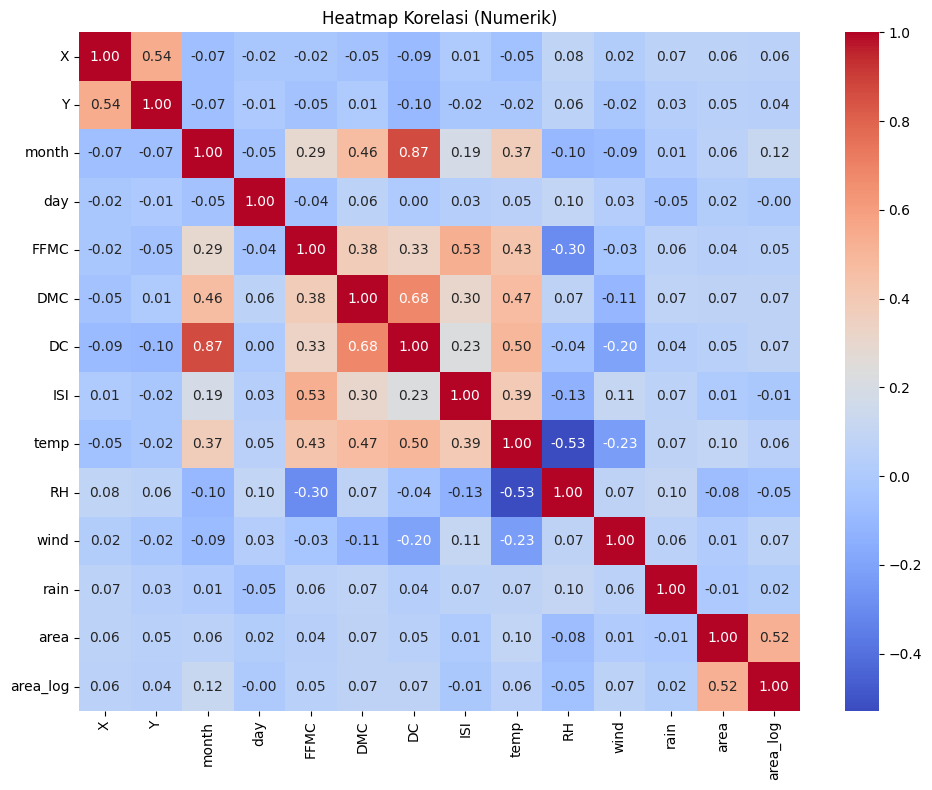

In [ ]:
# TAMPILKAN HEATMAP DI COLAB (paksa inline + fallback data)
%matplotlib inline

import os, numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt

# Paksa backend inline (kalau sebelumnya sempat set ke 'Agg')
try:
    plt.switch_backend('module://matplotlib_inline.backend_inline')
except Exception:
    pass

# Cari PROJECT_DIR jika ada
candidates = []
try:
    candidates.append(PROJECT_DIR)  # dari sel sebelumnya
except NameError:
    pass
candidates += [
    "/content/drive/MyDrive/UAS-ML-ForestFires",
    "/content/drive/MyDrive/UAS-ML",           # alternatif
    "/content"                                 # fallback terakhir
]

data_path = None
processed = False
for base in candidates:
    p1 = os.path.join(base, "data/data_processed/forestfires_clean.csv")
    p2 = os.path.join(base, "data/data_raw/forestfires.csv")
    if os.path.exists(p1):
        data_path = p1; processed = True; break
    if os.path.exists(p2):
        data_path = p2; processed = False; break

assert data_path is not None, (
    "Tidak menemukan 'forestfires_clean.csv' atau 'forestfires.csv'. "
    "Pastikan Drive sudah dimount & jalankan cell cleaning dulu."
)

df = pd.read_csv(data_path)

# Jika masih raw, lakukan cleaning minimal agar siap dipakai
if not processed or "area_log" not in df.columns:
    month_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
                 'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
    day_map   = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}
    if df['month'].dtype == object:
        df['month'] = df['month'].str.lower().map(month_map)
    if df['day'].dtype == object:
        df['day'] = df['day'].str.lower().map(day_map)
    df['area_log'] = np.log1p(df['area'])

# Heatmap korelasi numerik
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi (Numerik)")
plt.tight_layout()
plt.show()


In [ ]:
import os, json, pandas as pd, numpy as np

BASE = PROJECT_DIR
data_p = os.path.join(BASE, "data/data_processed/forestfires_clean.csv")
report_dir = os.path.join(BASE, "reports"); os.makedirs(report_dir, exist_ok=True)

df = pd.read_csv(data_p)

summary = {
    "n_rows": int(df.shape[0]),
    "n_cols": int(df.shape[1]),
    "columns": df.columns.tolist(),
    "dtypes": {c:str(t) for c,t in df.dtypes.items()},
    "missing_per_col": df.isna().sum().to_dict(),
    "n_duplicates": int(df.duplicated().sum()),
}

with open(os.path.join(report_dir, "analysis_summary.json"), "w") as f:
    json.dump(summary, f, indent=2)

# Simpan statistik deskriptif
desc = df.describe(include="all").transpose()
desc.to_csv(os.path.join(report_dir, "desc_stats.csv"))

print("Saved: analysis_summary.json, desc_stats.csv")


Saved: analysis_summary.json, desc_stats.csv


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import joblib

# =============================
# Pastikan target numerik
# =============================
y = df['area'].astype(float)   # Target numerik
X = df.drop(columns=['area'])

# Split ulang (biar X_train & y_train fresh)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =============================
# Hyperparameter Tuning
# =============================
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE (CV):", -grid_search.best_score_)

# =============================
# Evaluasi Model Terbaik
# =============================
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Test Data): {rmse}")
print(f"R² Score (Test Data): {r2}")

# =============================
# Simpan Model & Prediksi
# =============================
joblib.dump(best_model, "forestfire_regressor_tuned.pkl")
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
pred_df.to_csv("predictions_tuned.csv", index=False)

print("Model dan prediksi hasil tuning telah disimpan.")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best RMSE (CV): 17.709287907201468
RMSE (Test Data): 4.467506893283511
R² Score (Test Data): 0.9481728672462346
Model dan prediksi hasil tuning telah disimpan.


In [ ]:
# Ambil model terbaik dari hasil tuning
best_model = grid_search.best_estimator_

# Prediksi
y_pred = best_model.predict(X_test)

# Evaluasi
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Test Data): {rmse}")
print(f"R² Score (Test Data): {r2}")


RMSE (Test Data): 4.467506893283511
R² Score (Test Data): 0.9481728672462346


In [ ]:
import joblib
import pandas as pd

# Simpan model terbaik
joblib.dump(best_model, "forestfire_regressor_tuned.pkl")

# Simpan prediksi
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
pred_df.to_csv("predictions_tuned.csv", index=False)
